> Import packages.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,20)
plt.rcParams['font.size']=20
plt.rcParams['figure.dpi']=200

# import packages
import numpy as np

In [16]:
import cPickle as p
import numpy as np

# load data
#Z=p.load(open('single_snapshot.p','rb'))
Z=p.load(open('data/R8_8pc_metal.0010.scal0.p','rb'))

> Plot surface density.

In [3]:
Z.keys()

['y', 'x', 'z', 'time']

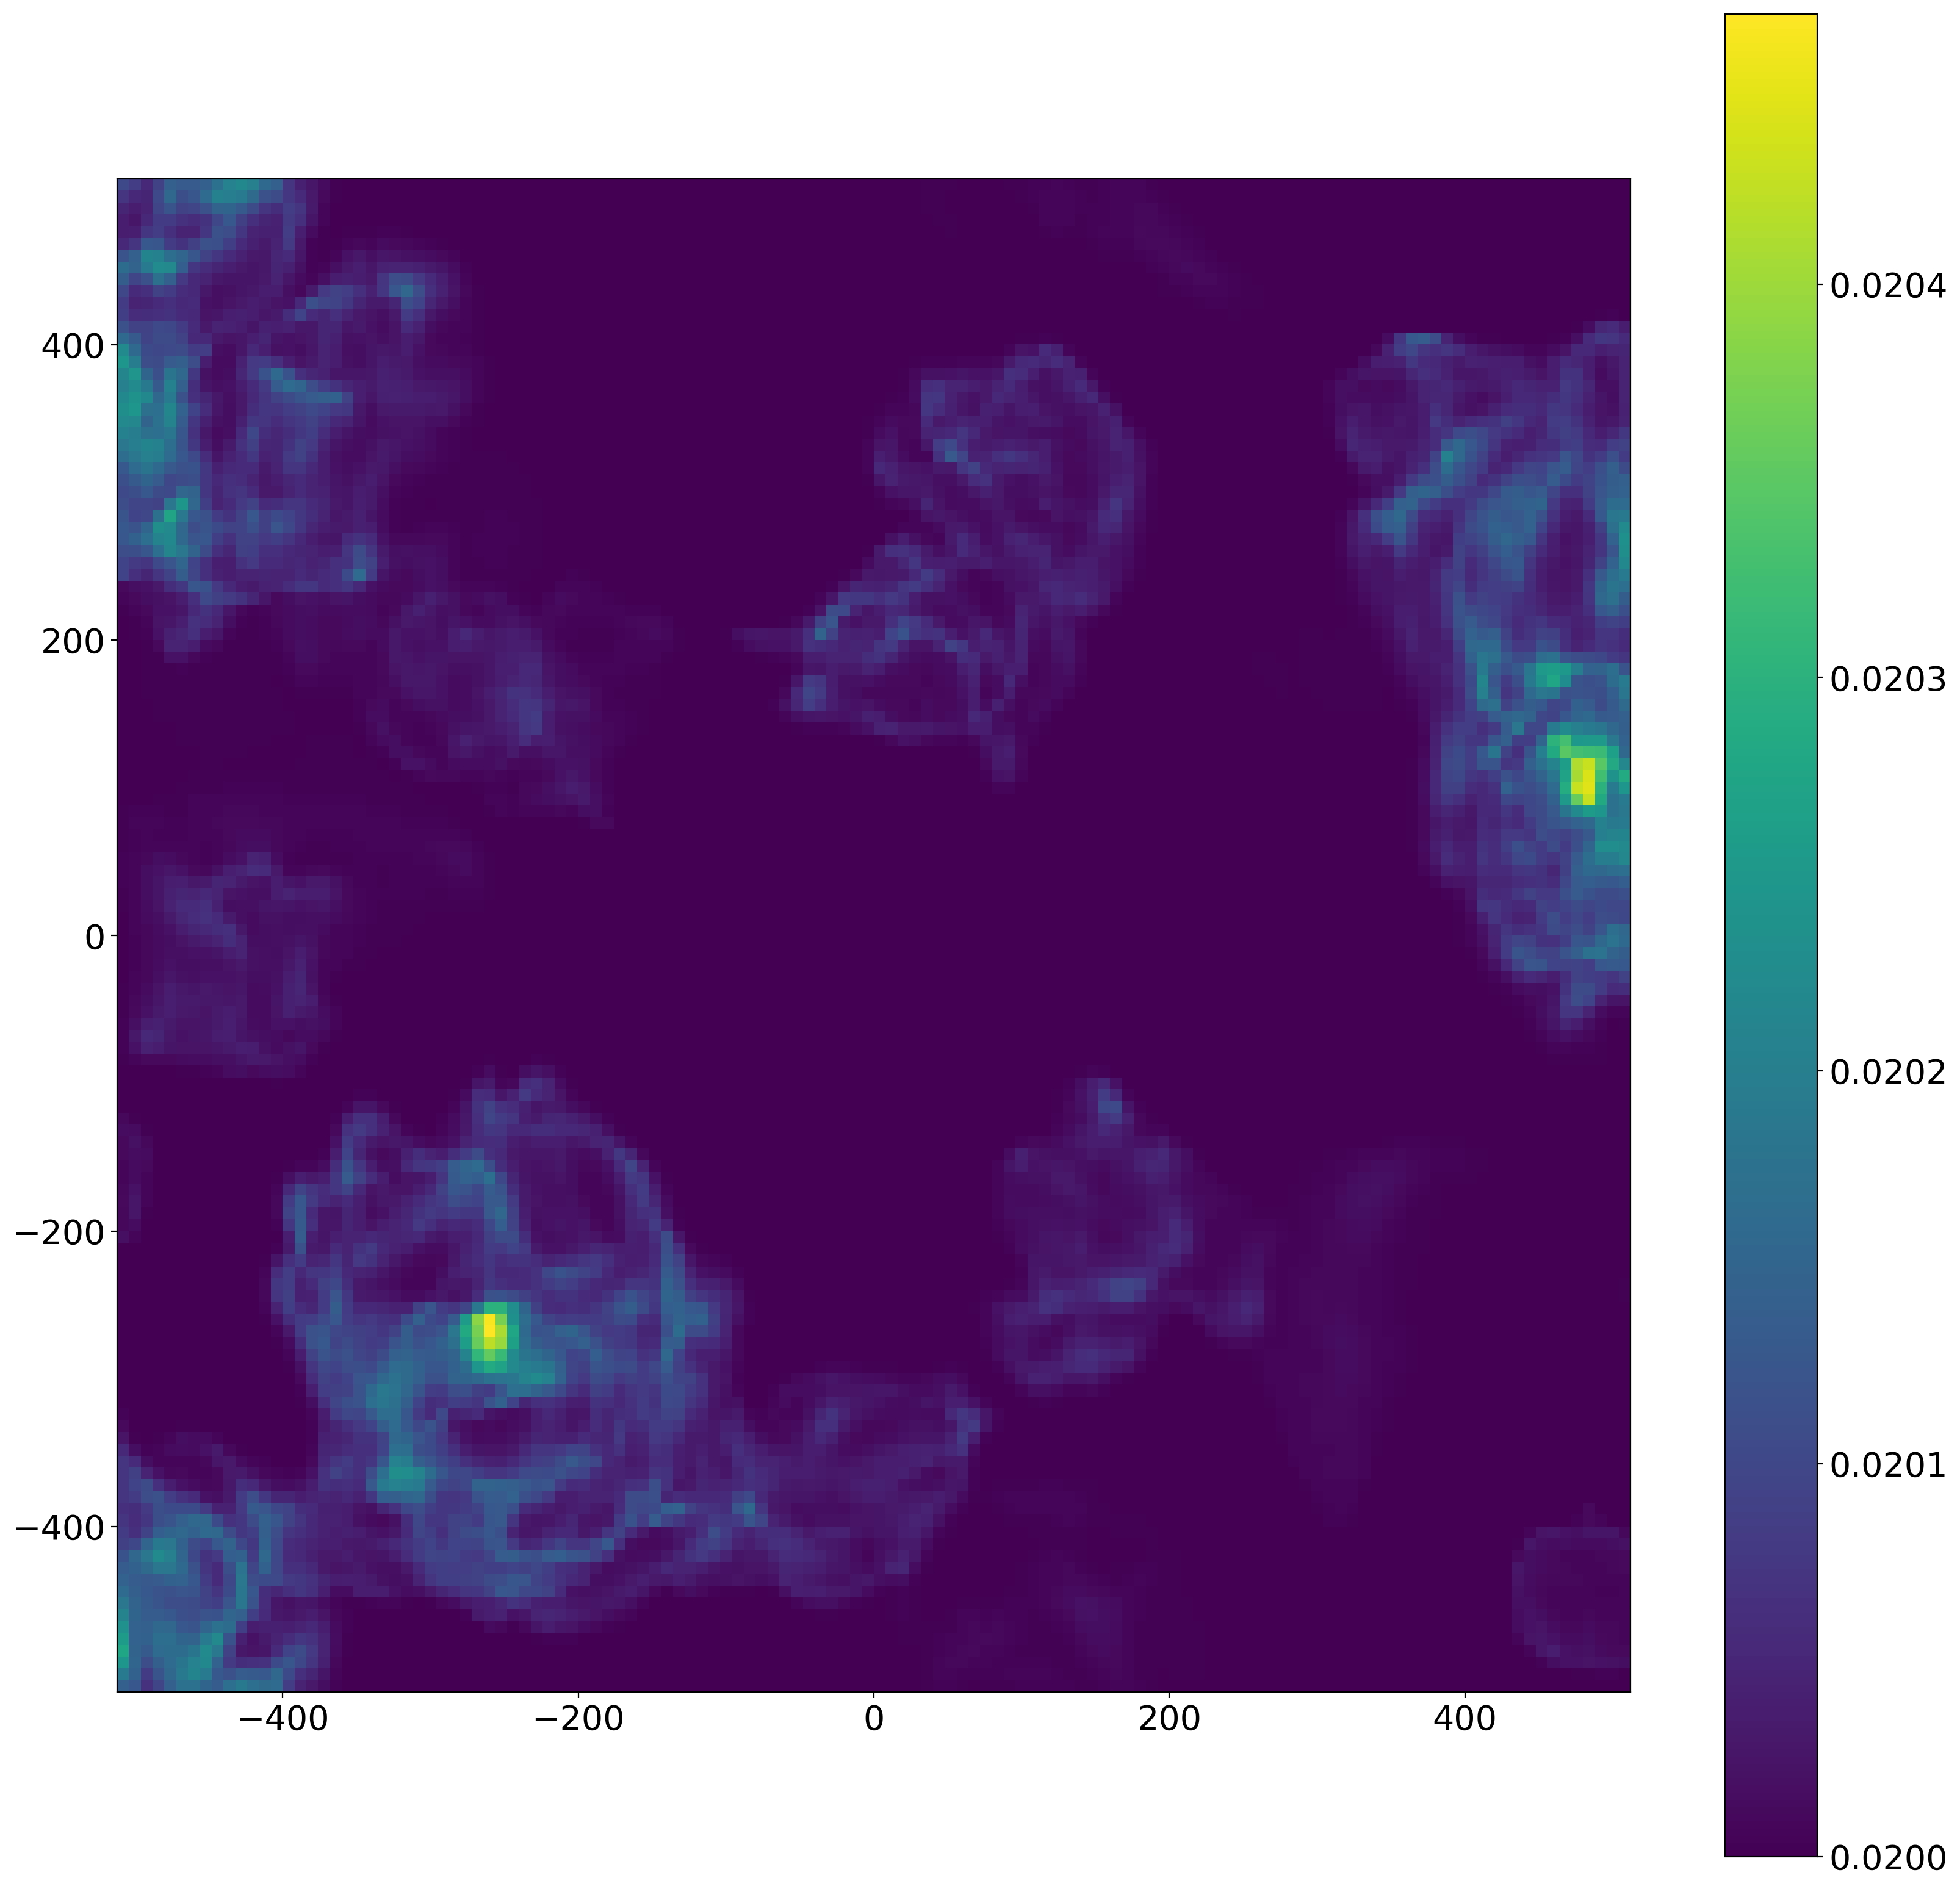

In [18]:
# load data: 'z' indicates integration along the 'z' axis
Zxy_data = Z['z']["data"]
Zxy_bounds = Z['z']["bounds"]

Nx,Ny=Zxy_data.shape

# plot surface density
plt.imshow(Zxy_data, extent=Zxy_bounds, origin='lower')
plt.colorbar()

> Display positions for displacement vectors

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  


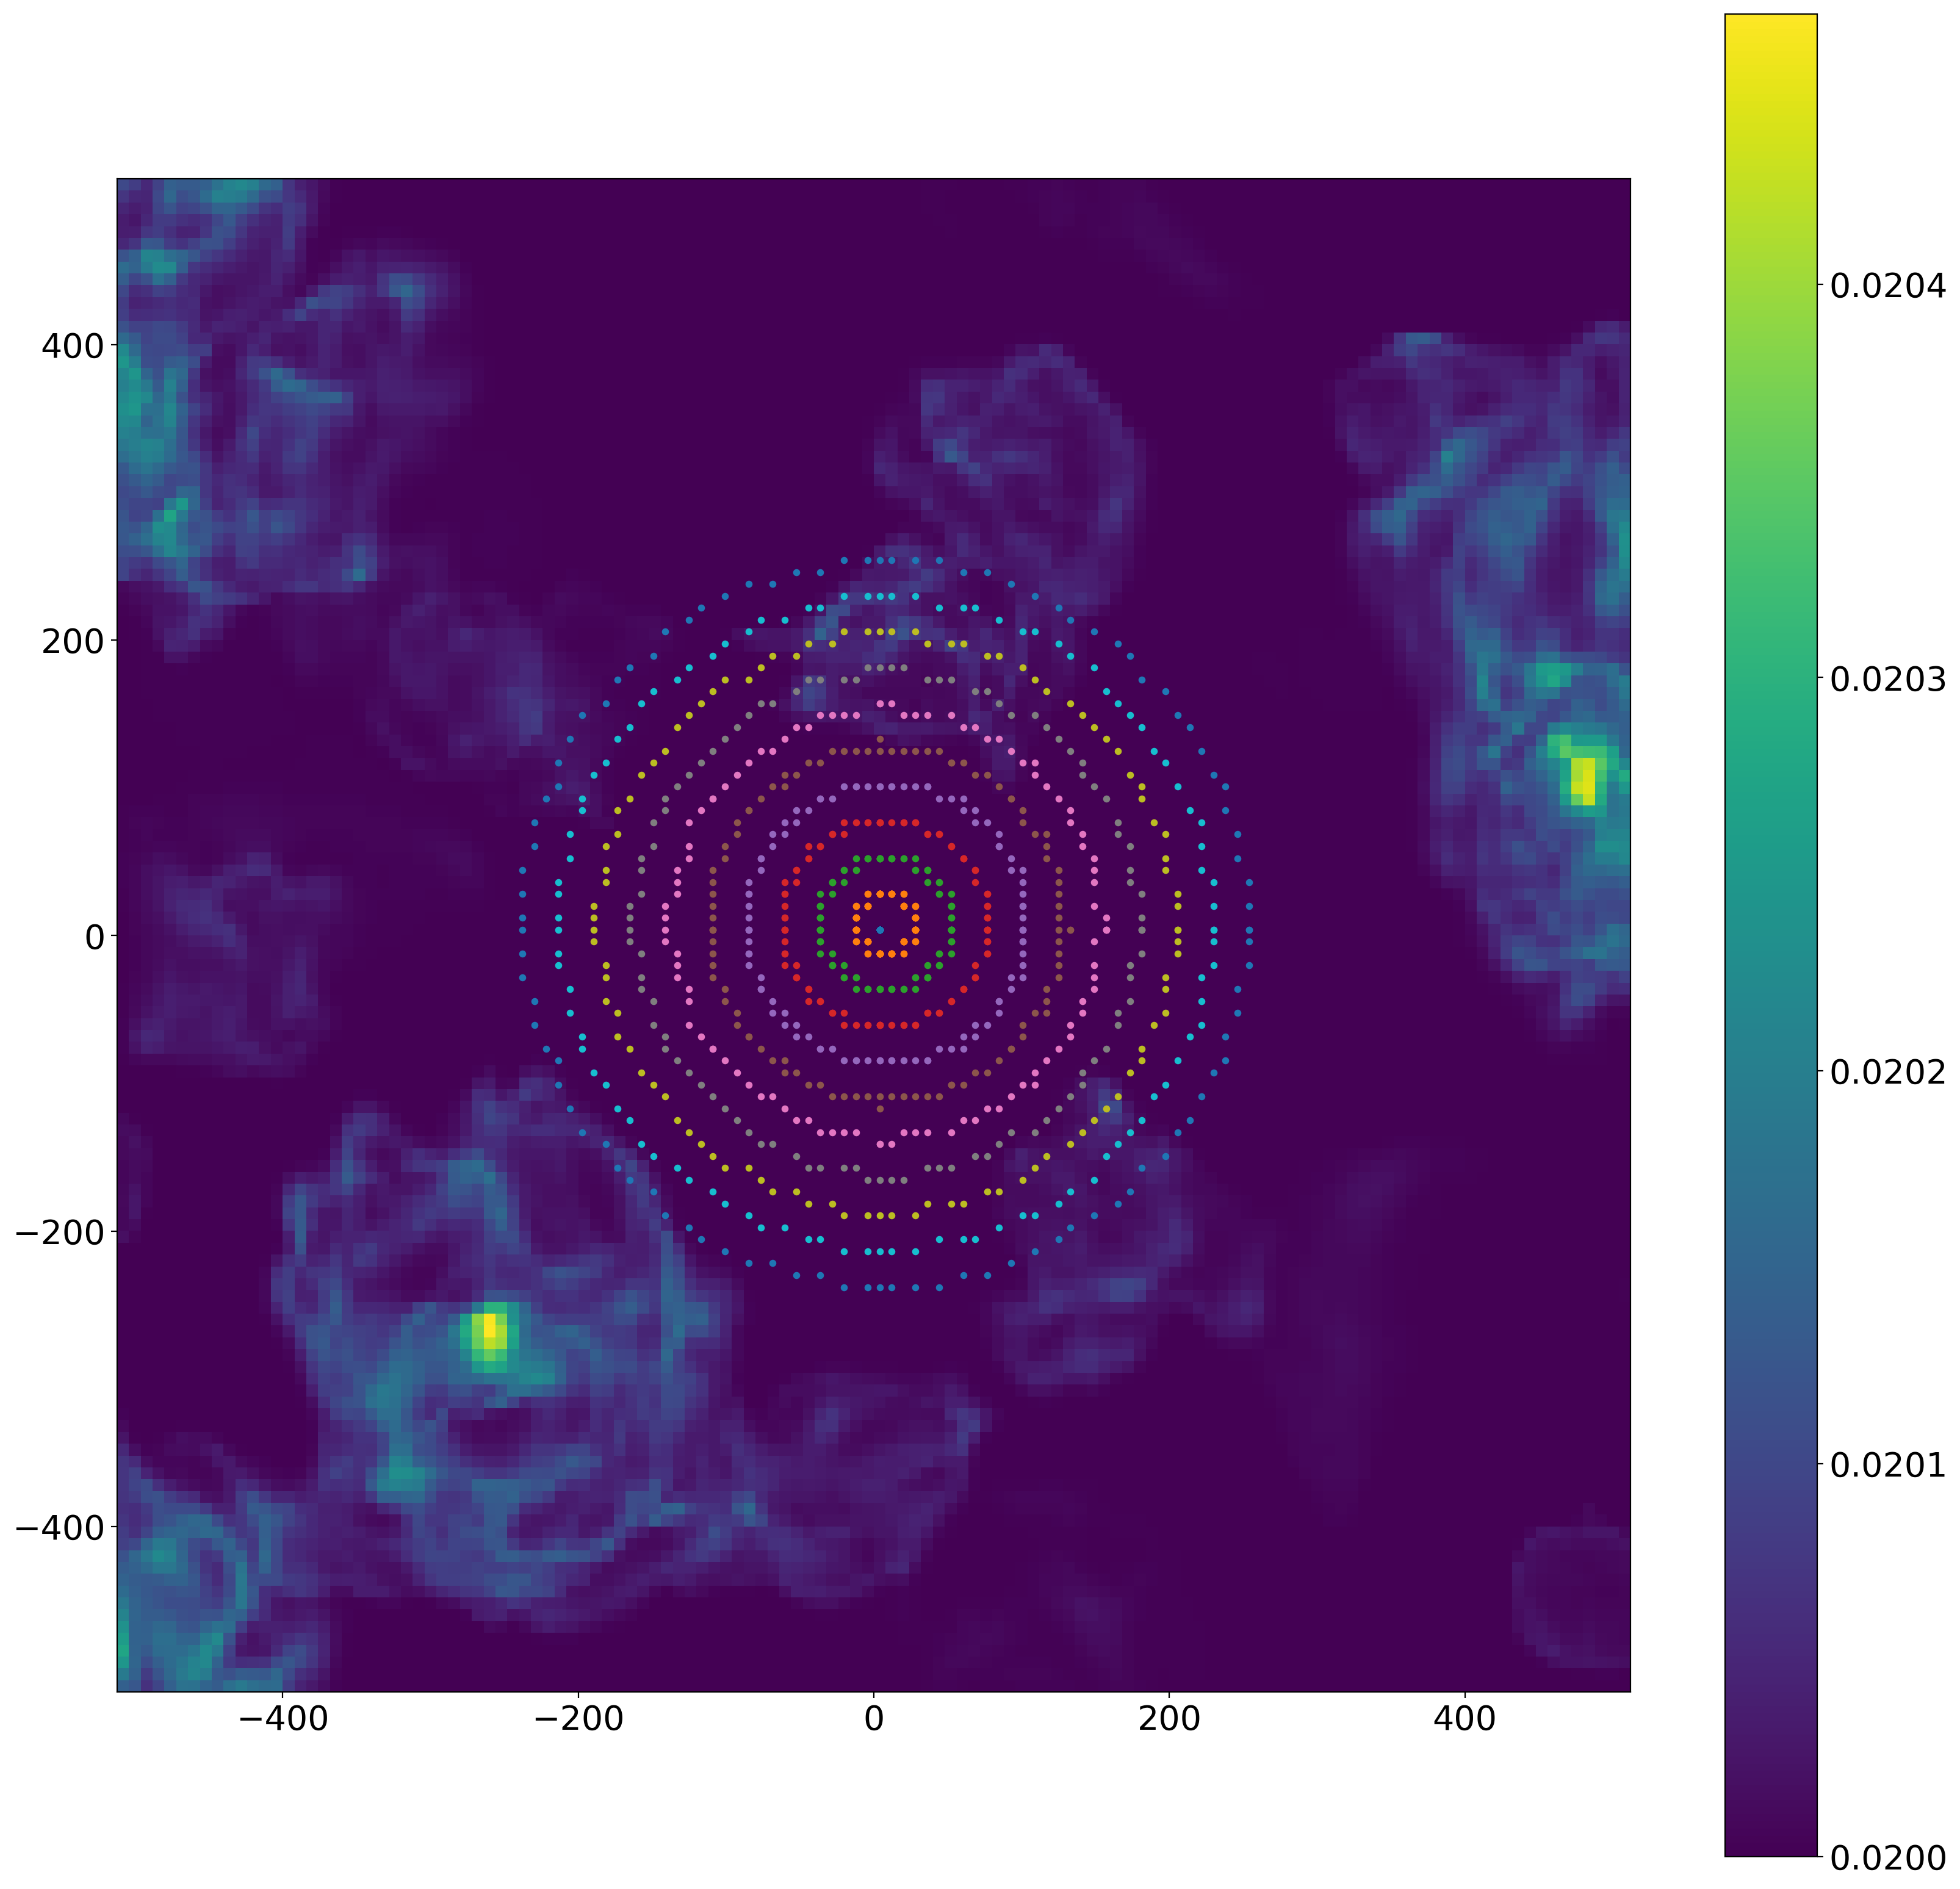

In [19]:
# plot surface density
plt.imshow(Zxy_data, extent=Zxy_bounds, origin='lower')
plt.colorbar()

#============================================================================================
# radius array
r_array = np.arange(11)*25
phi= np.linspace(0.,2*np.pi,100.)

# simulation array
sim_range = np.linspace(Zxy_bounds[0],Zxy_bounds[1],Zxy_data.shape[0])
sim_range_size = sim_range.size
sim_space = sim_range[1]-sim_range[0]

#--------------------------------------------------------------------------------------------
# loop over all radius
for i in range(r_array.size):
    
    # circle with radius r 
    r=r_array[i]
    dx=r*np.cos(phi)
    dy=r*np.sin(phi)
    
    # find the correspoding index
    di = (dx/sim_space + 0.5).astype("int")
    dj = (dy/sim_space + 0.5).astype("int")

#--------------------------------------------------------------------------------------------
    # choose a center index
    center_index = Nx/2
    di = di+center_index
    dj = dj+center_index

    # plot circle
    plt.scatter(sim_range[di%sim_range.size],sim_range[dj%sim_range.size], s=10)

> Calculate two-point Pearson correlation.

In [20]:


def calc_two_point(data,bounds):
    Nx,Ny=data.shape
    Nr=Nx/128*20
    #============================================================================================
    # radisu array
    r_array = np.arange(Nr+1)*25
    phi= np.linspace(0.,2*np.pi,100.)

    # initiate two point correlation results array
    xi_r = np.zeros(r_array.size)

    #-------------------------------------------------------------------------------------------
    # simulation array
    sim_range = np.linspace(bounds[0],bounds[1],data.shape[0])
    sim_range_size = sim_range.size
    sim_space = sim_range[1]-sim_range[0]

    # calculate the mean and variance metallicity field
    Sx_mean = np.mean(data)
    Sx_var = np.var(data)
    
    # data dimension arrays
    jj,kk=np.meshgrid(range(Nx),range(Ny))

    #--------------------------------------------------------------------------------------------
    # loop over all radius
    for i in range(r_array.size):

        # circle with radius r 
        r=r_array[i]
        dx=r*np.cos(phi)
        dy=r*np.sin(phi)

        # find the correspoding index
        dj = (dx/sim_space + 0.5).astype("int")
        dk = (dy/sim_space + 0.5).astype("int")

    #--------------------------------------------------------------------------------------------
        # loop over all index
        #Sx_cross = []
        #for j in range(sim_range_size):
        #    for k in range(sim_range_size):
        #        Sx_cross.extend(data[j,k]*data[(j+dj)%sim_range.size,(k+dk)%sim_range.size])
        #Sx_cross = np.array(Sx_cross)
        djj=(dj[np.newaxis,np.newaxis,:]+jj[:,:,np.newaxis])%Nx
        dkk=(dk[np.newaxis,np.newaxis,:]+kk[:,:,np.newaxis])%Ny
        #print dkk.max(),djj.max()
        Sx_cross = data[:,:,np.newaxis]*data[dkk,djj]
        # calculate two point
        xi_r[i] = (np.mean(Sx_cross) - Sx_mean**2)/(Sx_var)
    return r_array,xi_r

In [22]:
r1,xi1=calc_two_point(Zxy_data,Zxy_bounds)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


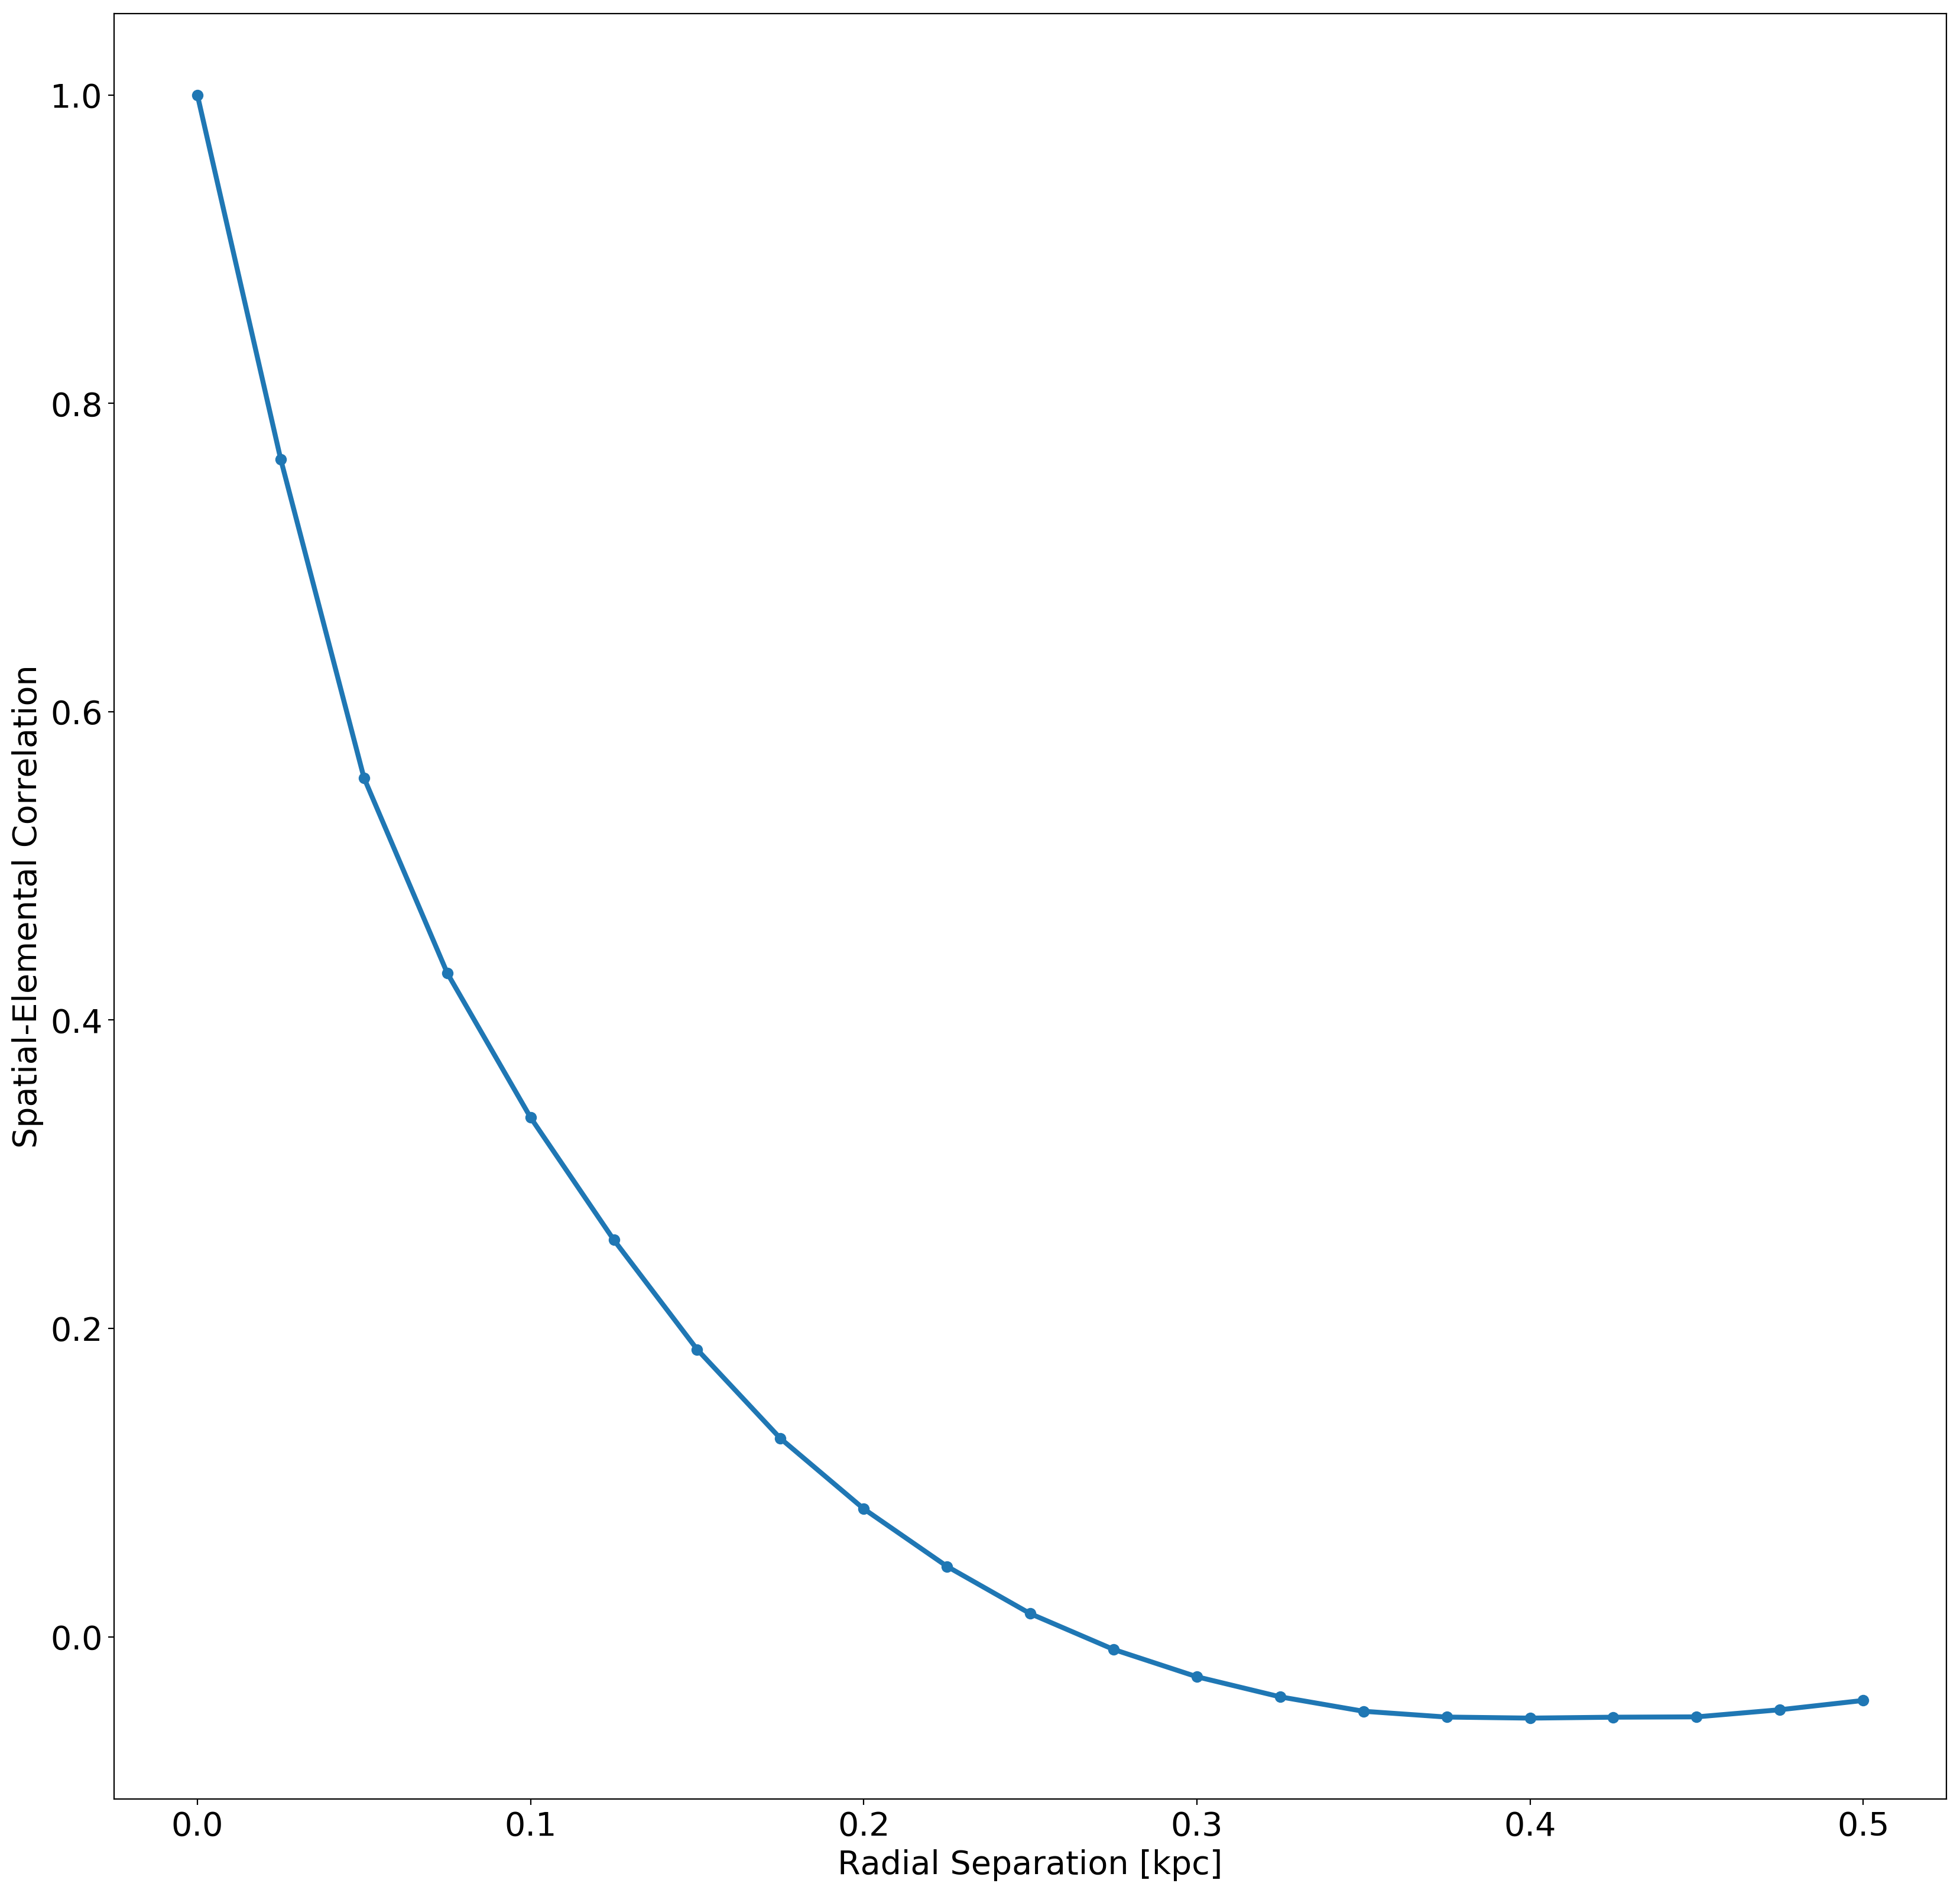

In [23]:
   
#============================================================================================
# plot results
plt.xlabel("Radial Separation [kpc]")
plt.ylabel("Spatial-Elemental Correlation")
plt.plot(r1/1000.,xi1, lw=3, marker='o')
plt.savefig("Two-Point.png",bbox_inches='tight')